In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
for i in df["Survived"].value_counts():
    print (i*100/df["Survived"].count())

61.61616161616162
38.38383838383838


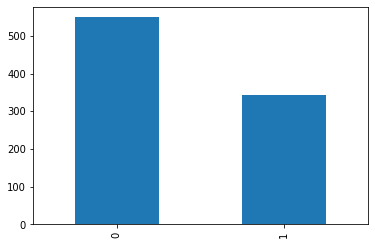

In [14]:
df["Survived"].value_counts().plot.bar()
plt

### Calculate the proportion of surviving first class passengers to total first-class passengers

In [16]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [307]:
df_1st=df[df["Pclass"]==1].groupby("Survived").describe()["PassengerId"]
df_1st


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,80.0,410.300000,252.655587,7.0,174.00,437.0,608.75,873.0
1,136.0,491.772059,239.006988,2.0,307.75,510.5,693.50,890.0


In [312]:
df_1st["count"][1]/df_1st["count"].sum()


0.6296296296296297

###  Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

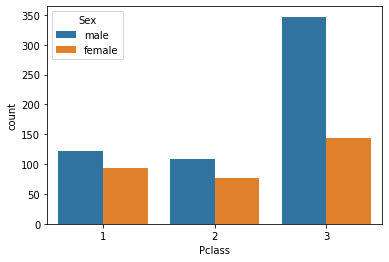

In [323]:
sns.countplot(x="Pclass", data = df,  hue=df["Sex"])

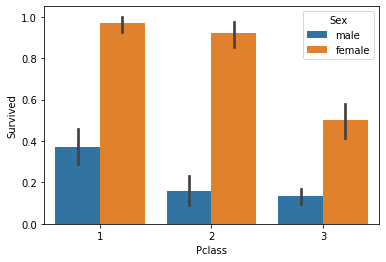

In [81]:
sns.barplot(x="Pclass", y="Survived", data = df,  hue=df["Sex"])

In [83]:
#sns.pairplot(df)

### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  after removing the cwd from sys.path.


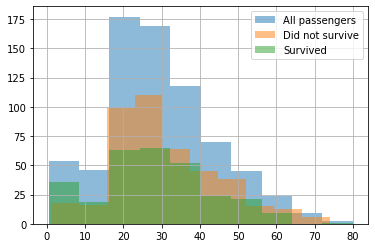

In [99]:
ax1=df["Age"].hist(alpha=0.5)
ax2=df[df["Survived"]==0]["Age"].hist(alpha=0.5)
ax3=df[df["Survived"]==1]["Age"].hist(alpha=0.5)
plt.legend([ax1, ax2, ax3], labels=["All passengers", "Did not survive", "Survived"])

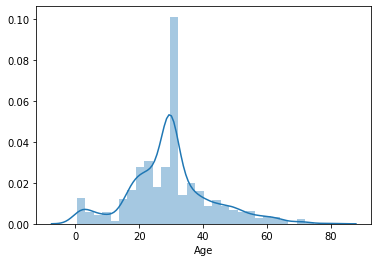

In [271]:
#sns.distplot(df["Age"])

### Calculate the average age for survived and drowned passengers separately.

In [211]:
df2 = df[["Survived", "Age"]]
df2_desc = df2.groupby("Survived")["Age"].mean()

In [213]:
mean_age_drowned = df2_desc[0]
mean_age_survived = df2_desc[1]


29.69911764705882

### Replace missing age values by the mean age

In [324]:
mean_age = df["Age"].mean()
mean_age

29.699117647058763

In [325]:
df2["Age"].fillna(mean_age, inplace= True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [327]:
df["Age"].fillna(mean_age, inplace= True)

In [356]:
df[["Age"]==.isna().sum()

0

### Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.



In [351]:
df3 = df[["Pclass","Sex","Survived"]]
df3.groupby(["Pclass", "Sex", "Survived"]).size()


Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64